<a href="https://colab.research.google.com/github/Sara-Esm/Retail-Sales-Forecasting/blob/main/Retail_Sales_Forecasting_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install openpyxl

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
df = pd.read_excel(url)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [6]:
df.dropna(subset=['CustomerID'], inplace=True)

In [7]:
df.duplicated().sum()

5225

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [10]:
df = df[df['Quantity'] > 0]

In [11]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [12]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour
df['Weekday'] = df['InvoiceDate'].dt.weekday

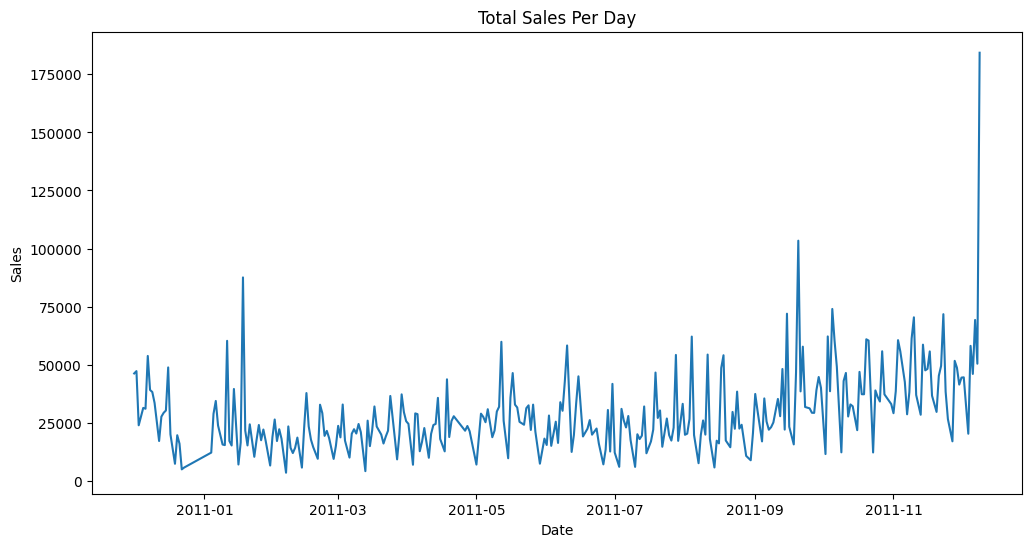

In [13]:
sales_per_day = df.groupby(df['InvoiceDate'].dt.date)['TotalPrice'].sum()
plt.figure(figsize=(12,6))
sales_per_day.plot()
plt.title('Total Sales Per Day')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

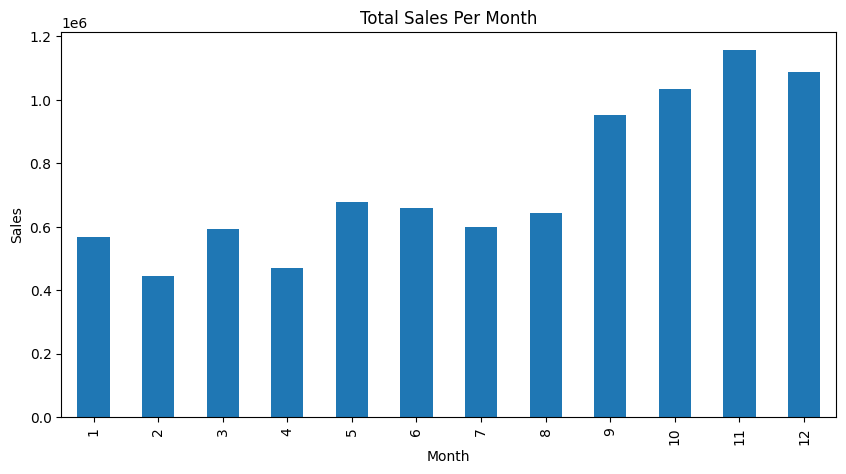

In [14]:
sales_per_month = df.groupby('Month')['TotalPrice'].sum()
plt.figure(figsize=(10,5))
sales_per_month.plot(kind='bar')
plt.title('Total Sales Per Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

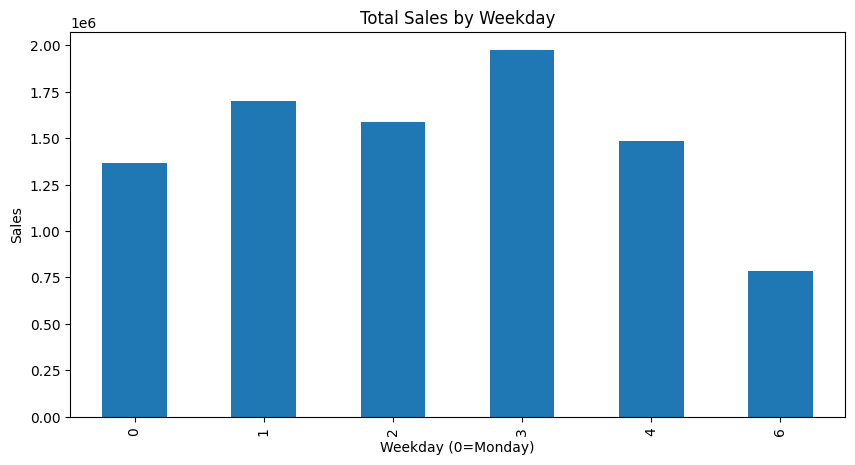

In [15]:
sales_per_weekday = df.groupby('Weekday')['TotalPrice'].sum()
plt.figure(figsize=(10,5))
sales_per_weekday.plot(kind='bar')
plt.title('Total Sales by Weekday')
plt.xlabel('Weekday (0=Monday)')
plt.ylabel('Sales')
plt.show()

In [16]:
daily_sales = df.set_index('InvoiceDate').resample('D')['TotalPrice'].sum().reset_index()
daily_sales.head()

,InvoiceDate,TotalPrice
0,2010-12-01,46192.49
1,2010-12-02,47197.57
2,2010-12-03,23876.63
3,2010-12-04,0.00
4,2010-12-05,31361.28


In [17]:
all_dates = pd.date_range(start=daily_sales['InvoiceDate'].min(), end=daily_sales['InvoiceDate'].max())
daily_sales = daily_sales.set_index('InvoiceDate').reindex(all_dates, fill_value=0).rename_axis('InvoiceDate').reset_index()

In [18]:
# Let's say we use the last 3 months as the test set
split_date = daily_sales['InvoiceDate'].max() - pd.Timedelta(days=90)
train = daily_sales[daily_sales['InvoiceDate'] <= split_date]
test = daily_sales[daily_sales['InvoiceDate'] > split_date]

In [19]:
for lag in range(1, 8):  # Create lag features for the past 7 days
    train[f'lag_{lag}'] = train['TotalPrice'].shift(lag)

<ipython-input-19-4941997d06fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[f'lag_{lag}'] = train['TotalPrice'].shift(lag)
<ipython-input-19-4941997d06fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[f'lag_{lag}'] = train['TotalPrice'].shift(lag)
<ipython-input-19-4941997d06fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [20]:
train.dropna(inplace=True)

<ipython-input-20-c8b0e428b06a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.dropna(inplace=True)


In [21]:
train['rolling_mean_7'] = train['TotalPrice'].rolling(window=7).mean()
train.dropna(inplace=True)

<ipython-input-21-9c86199e92ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['rolling_mean_7'] = train['TotalPrice'].rolling(window=7).mean()
<ipython-input-21-9c86199e92ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.dropna(inplace=True)


In [22]:
!pip install xgboost

In [23]:
features = [col for col in train.columns if col not in ['InvoiceDate', 'TotalPrice']]
X_train = train[features]
y_train = train['TotalPrice']

In [24]:
import xgboost as xgb

model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [25]:
test_features = test.copy()
for lag in range(1, 8):
    test_features[f'lag_{lag}'] = test_features['TotalPrice'].shift(lag)
test_features['rolling_mean_7'] = test_features['TotalPrice'].rolling(window=7).mean()
test_features.dropna(inplace=True)

X_test = test_features[features]
y_test = test_features['TotalPrice']

In [26]:
predictions = model.predict(X_test)

In [27]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 15810.305584555017


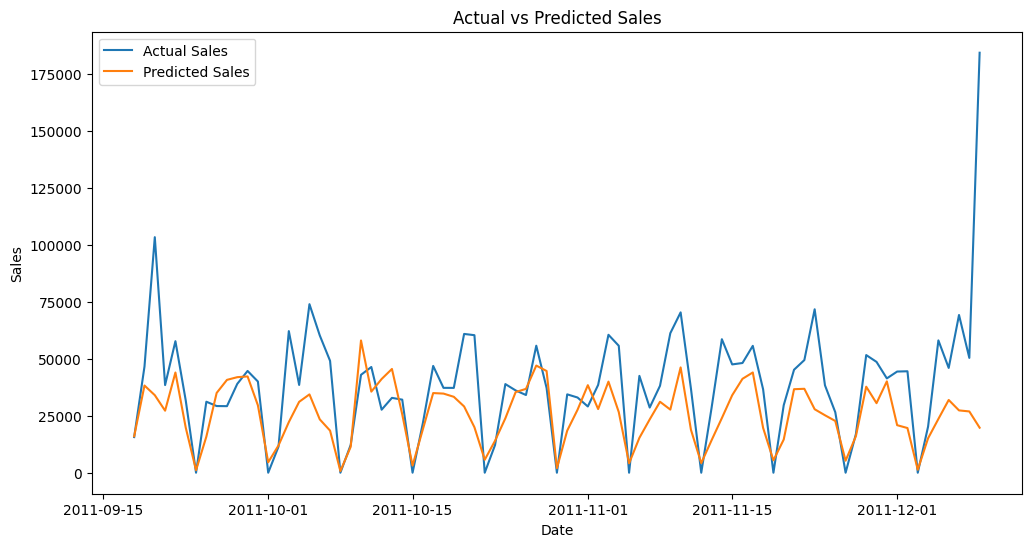

In [28]:
plt.figure(figsize=(12,6))
plt.plot(test_features['InvoiceDate'], y_test, label='Actual Sales')
plt.plot(test_features['InvoiceDate'], predictions, label='Predicted Sales')
plt.legend()
plt.title('Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [29]:
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5
)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [30]:
train['day_of_week'] = train['InvoiceDate'].dt.dayofweek
test_features['day_of_week'] = test_features['InvoiceDate'].dt.dayofweek
features.append('day_of_week')

<ipython-input-30-7a3cc2282264>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['day_of_week'] = train['InvoiceDate'].dt.dayofweek


In [31]:
train['is_weekend'] = train['day_of_week'].isin([5,6]).astype(int)
test_features['is_weekend'] = test_features['day_of_week'].isin([5,6]).astype(int)
features.append('is_weekend')

<ipython-input-31-84029050b677>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['is_weekend'] = train['day_of_week'].isin([5,6]).astype(int)


In [32]:
import joblib
joblib.dump(model, 'sales_forecasting_model.pkl')

['sales_forecasting_model.pkl']